## *k* Means Clustering

In [1]:
! git clone https://github.com/sterlinggutterman/Final-Project

Cloning into 'Final-Project'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 128 (delta 56), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (128/128), 38.40 MiB | 9.11 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy

In [3]:
df = pd.read_parquet('/content/Final-Project/full_df (2).parquet')
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,reordered_yes/no,order_day,total_order_count,product_name,aisle_id,department_id,aisle,department
0,361493,27,prior,1,3,9,NaN,25718,1,0,no,tuesday,81,Cold Brew Coffee,26,7,coffee,beverages
1,1662354,27,prior,2,2,17,6.0,30776,1,0,no,monday,81,Organic Raw Kombucha Gingerade,31,7,refrigerated,beverages
2,1662354,27,prior,2,2,17,6.0,9604,2,0,no,monday,81,Hibiscus Organic Raw Kombucha,31,7,refrigerated,beverages
3,1662354,27,prior,2,2,17,6.0,6287,3,0,no,monday,81,Organic & Raw Strawberry Serenity Kombucha,31,7,refrigerated,beverages
4,1662354,27,prior,2,2,17,6.0,20947,4,0,no,monday,81,Passionberry Bliss Kombucha Drink,31,7,refrigerated,beverages


In [4]:
df['department'].value_counts()

,count
department,
produce,767537
dairy eggs,438764
snacks,210625
beverages,207337
pantry,136252
frozen,129310
bakery,89407
deli,72244
canned goods,62012


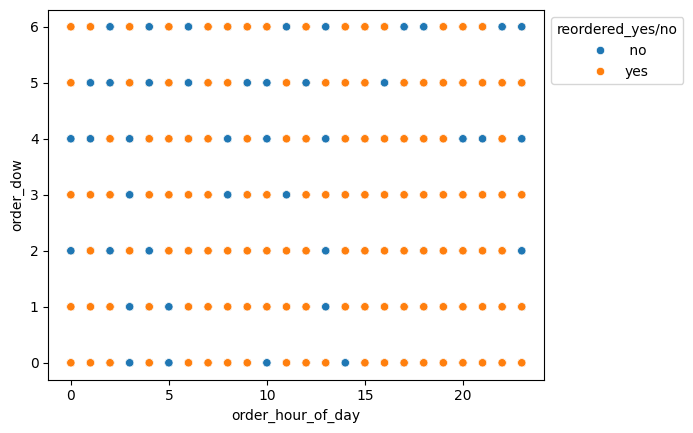

In [11]:
pattern_plot = sns.scatterplot(x='order_hour_of_day',y='order_dow',hue='reordered_yes/no',data=df)
sns.move_legend(pattern_plot, "upper left", bbox_to_anchor=(1,1))

This initial scatterplot demonstrates that there isn't any super observable pattern among what days and times of the week are the most popular ordering times for the various departments.

k Means Clustering with order_hour_of_day and order_dow

In [5]:
# order_hour_of_day and order_dow

from sklearn.cluster import KMeans

# Max-min
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x

# Normalizations
df['x1'] = maxmin(df['order_hour_of_day'])
df['x2'] = maxmin(df['order_dow'])
min_x1 = min(df.loc[:,'order_hour_of_day'])
max_x1 = max(df.loc[:,'order_hour_of_day'])
min_x2 = min(df.loc[:,'order_dow'])
max_x2 = max(df.loc[:,'order_dow'])

# Pre-processing
X = df.loc[ : , ['x1','x2'] ]
X.head()


,x1,x2
0,0.391304,0.500000
1,0.739130,0.333333
2,0.739130,0.333333
3,0.739130,0.333333
4,0.739130,0.333333


In [7]:
#from sklearn.cluster import KMeans
# This ultimately did not provide a meaningful relationship

# Max-min
#def maxmin(x):
  #x = (x-min(x))/(max(x)-min(x))
  #return x

# Normalizations
#df['x1'] = maxmin(df['department_id'])
#df['x2'] = maxmin(df['reordered'])
#min_x1 = min(df.loc[:,'department_id'])
#max_x1 = max(df.loc[:,'department_id'])
#min_x2 = min(df.loc[:,'reordered'])
#max_x2 = max(df.loc[:,'reordered'])

# Pre-processing
#X = df.loc[ : , ['x1','x2'] ]
#X.head()

,x1,x2
0,0.3,0.0
1,0.3,0.0
2,0.3,0.0
3,0.3,0.0
4,0.3,0.0


Text(0.5, 1.0, 'Initial Data')

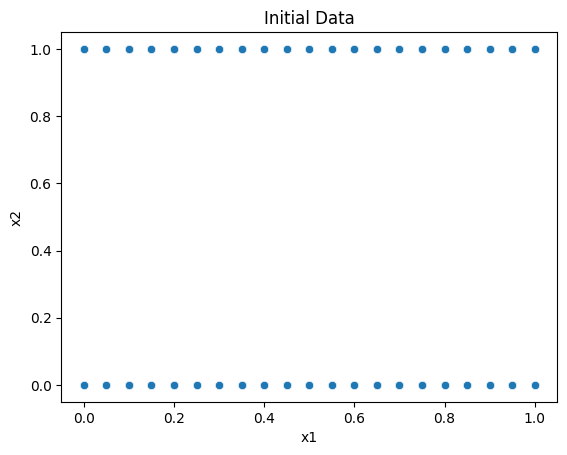

In [8]:
# Initial plot

sns.scatterplot(data=df,x='x1',y='x2').set_title('Initial Data')

Iteration 1 of k means clustering

In [8]:
np.random.seed(10)
initial_centroids = np.random.randint(low=1,high=X.shape[0],size=4)
model = KMeans(n_clusters=4,max_iter=1,init=X.iloc[initial_centroids,:],random_state=0)
model = model.fit(X)
df['g_hat'] = model.predict(X)

centers = model.cluster_centers_
centroid_x_1 = centers[:,0]*(max_x1-min_x1)+min_x1
centroid_x_2 = centers[:,1]*(max_x2-min_x2)+min_x2
plot_1 = sns.scatterplot(data=df,x='order_hour_of_day',y='order_dow',
                        hue='g_hat',style='g_hat').set_title('Iteration 1')
plt.scatter(centroid_x_1,centroid_x_2)

# This runtime takes too long, had to stop at 4 minutes.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Error in callback <function flush_figures at 0x7c4ba0e511b0> (for post_execute):


KeyboardInterrupt: 

Iteration 2 of k means clustering - runtime ended up being too long, resulted in using the condensed version of k means clustering.

In [2]:
np.random.seed(10)
initial_centroids = np.random.randint(low=1,high=X.shape[0],size=4)
model = KMeans(n_clusters=4,max_iter=2,init=X.iloc[initial_centroids,:],random_state=0)
model = model.fit(X)
df['g_hat'] = model.predict(X)

centers = model.cluster_centers_
centroid_x_1 = centers[:,0]*(max_x1-min_x1)+min_x1
centroid_x_2 = centers[:,1]*(max_x2-min_x2)+min_x2
plot_1 = sns.scatterplot(data=df,x='order_hour_of_day',y='order_dow',
                        hue='g_hat',style='g_hat').set_title('Iteration 2')
plt.scatter(centroid_x_1,centroid_x_2)

# Runtime takes too long.

NameError: name 'np' is not defined

# Condensed version of k means clustering with pre-set iterations, etc.


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


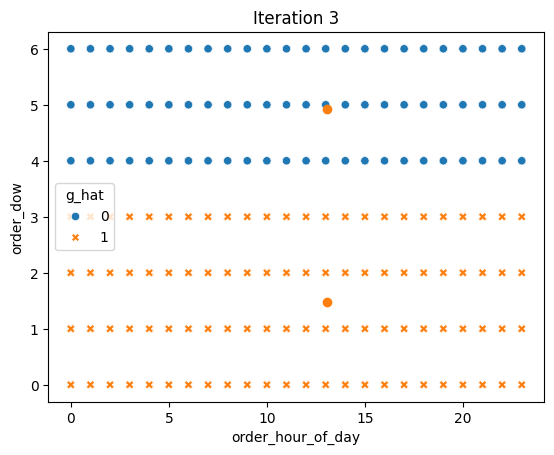

In [8]:
# Condensed version of k means clustering with pre-set iterations, etc.
# changed clusters from 4 to 2 after creating scree plot - elbow point was found at 2 that minimizes SSE

model = KMeans(n_clusters=2,random_state=0)
model = model.fit(X)
df['g_hat'] = model.predict(X)

centers = model.cluster_centers_
centroid_x_1 = centers[:,0]*(max_x1-min_x1)+min_x1
centroid_x_2 = centers[:,1]*(max_x2-min_x2)+min_x2
plot_2 = sns.scatterplot(data=df,x='order_hour_of_day',y='order_dow',hue='g_hat',
                         style='g_hat').set_title('Iteration 3'
                             )
plt.scatter(centroid_x_1,centroid_x_2)


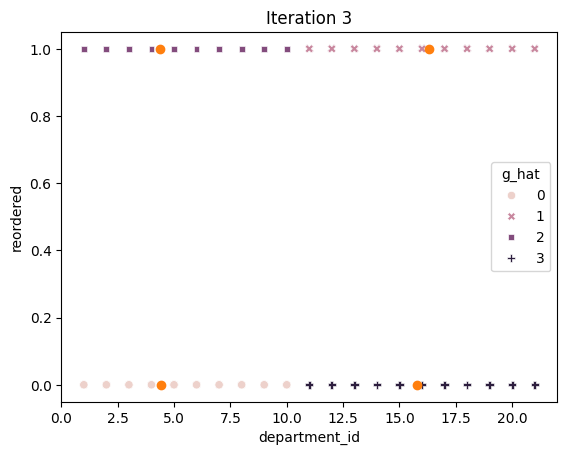

In [9]:
# k means clustering with department_id and reordered
#model = KMeans(n_clusters=4,random_state=0)
#model = model.fit(X)
#df['g_hat'] = model.predict(X)

#centers = model.cluster_centers_
#centroid_x_1 = centers[:,0]*(max_x1-min_x1)+min_x1
#centroid_x_2 = centers[:,1]*(max_x2-min_x2)+min_x2
#plot_2 = sns.scatterplot(data=df,x='department_id',y='reordered',hue='g_hat',
                         #style='g_hat').set_title('Iteration 3'
                             #)
#plt.scatter(centroid_x_1,centroid_x_2)

# this doesn't demonstrate a meaningful relationship


Scree plot

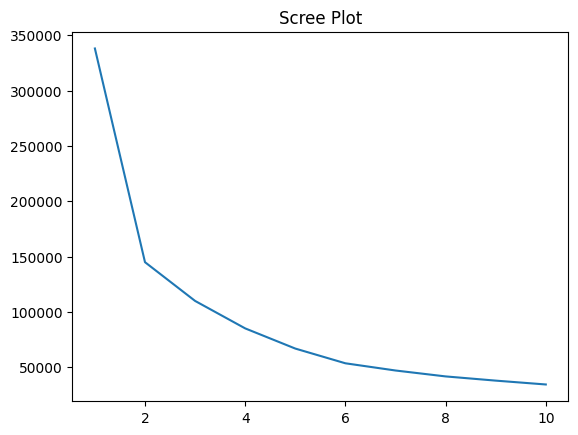

In [10]:
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x

# Scree plot
k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for j in range(k_bar):
  model = KMeans(n_clusters=k_grid[j], max_iter=300, n_init=10,
                 random_state=0)
  model = model.fit(X)
  SSE[j] = model.inertia_

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

Hierarchical Clustering

In [1]:
# was not successful due to runtime errors
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical clustering
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
model.fit(X)
df['g_hat'] = model.labels_
plot_hc = sns.scatterplot(x='price',y='sales',data=df,hue='g_hat',style='department')
sns.move_legend(plot_hc, "upper left", bbox_to_anchor=(1,1))

# Dendogram
plt.figure()
Z = linkage(X, 'ward')
dendrogram(Z, orientation='top', distance_sort='descending',show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index of Data Points')
plt.ylabel('Distance')
plt.show()


NameError: name 'X' is not defined